Brick CNot with random single Qubit gates

In [3]:

# import numpy as np
from qiskit import QuantumCircuit, transpile,Aer,execute
# from qiskit.quantum_info import Kraus, SuperOp
from qiskit_aer import AerSimulator,qasm_simulator
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info import DensityMatrix, partial_trace,random_statevector
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from qiskit.visualization import plot_state_city, plot_state_qsphere


Brick cnot clifford

In [1]:
def initialize_zero(q,n):
    for i in range(n):
        q.initialize([1,0],i)
    return(q)
def initialize_R_product_state(q,n):
    for i in range(n):
        q.initialize(random_statevector(2).data,i)
    return(q)
def random_clifford(n,qc):
    qubits_list=list(range(n))
    for i in range(2560):
        choice=random.choices(['s','h','cnot'])[0]
        qbit=random.choices(qubits_list)[0]
        if choice=='s':
            qc.s(qbit)
        elif choice=='h':
            qc.h(qbit)
        elif choice=='cnot':
            c=qubits_list.copy()
            c.remove(qbit)
            control_bit=random.choices(c)[0]
            qc.cnot(control_bit,qbit)
    return qc
def Brick_Cnot_clifford(n,qc,first):
    if(first==True):
        depth=500
    else:
        depth=math.log(n,2)
    layer=0

    while(depth>layer):
        ##layer of even random s and t gate
        for i in range(n):
            choice=random.choices(['s','h'])[0]
            if(choice=='s'):
                qc.s(i)
            elif(choice=='h'):
                qc.h(i)
        layer+=1
        ##layer of even cnot gate 
        for i in range(0,n-1,2):
            qc.cnot(i,i+1)
        layer+=1
        
        ##layer of odd random s and t gate again 
        for i in range(1,n-1,1):
            choice=random.choices(['s','h'])[0]
            if(choice=='s'):
                qc.s(i)
            elif(choice=='h'):
                qc.h(i)
        layer+=1
        
        ##layer of odd cnot    
        for i in range(1,n-2,2):
            qc.cnot(i,i+1)
        layer+=1
    return qc

In [13]:
n=16
qc=QuantumCircuit(n)
##initialization
# qc=initialize_R_product_state(qc,n)
qc=initialize_zero(qc,n)
qc=random_clifford(n,qc)
# layer of T gate
# for i in range(n):
#     qc.t(i)
# qc=random_clifford(n,qc)
# qc=random_clifford(n,qc)
# qc=random_clifford(n,qc)
# qc=random_clifford(n,qc)


qc.draw()

┌─────────────────┐┌───┐                                             »
 q_0: ┤ Initialize(1,0) ├┤ S ├─────────────────────────────────────────────»
      ├─────────────────┤├───┤┌───┐                                        »
 q_1: ┤ Initialize(1,0) ├┤ H ├┤ S ├────────────────────────────────────────»
      ├─────────────────┤├───┤├───┤                                        »
 q_2: ┤ Initialize(1,0) ├┤ S ├┤ S ├────────────────────────────────────────»
      ├─────────────────┤├───┤├───┤┌───┐                                   »
 q_3: ┤ Initialize(1,0) ├┤ S ├┤ S ├┤ H ├───────────────────────────────────»
      ├─────────────────┤├───┤├───┤└───┘               ┌───┐┌───┐          »
 q_4: ┤ Initialize(1,0) ├┤ S ├┤ S ├────────────────────┤ X ├┤ S ├──────────»
      ├─────────────────┤├───┤├───┤┌───┐               └─┬─┘└───┘          »
 q_5: ┤ Initialize(1,0) ├┤ S ├┤ S ├┤ H ├─────────────────┼─────────■────■──»
      ├─────────────────┤├───┤└───┘└───┘          ┌───┐  │  ┌───┐  │    │  »
 q_6: ┤ Initialize(1,0) ├┤ H ├─────────────────■──┤ S ├──┼──┤ S ├──┼────┼──»
      ├─────────────────┤├───┤     ┌───┐┌───┐  │  ├───┤  │  ├───┤  │    │  »
 q_7: ┤ Initialize(1,0) ├┤ X ├─────┤ X ├┤ H ├──┼──┤ S ├──┼──┤ H ├──┼────┼──»
      ├─────────────────┤└─┬─┘┌───┐└─┬─┘├───┤  │  ├───┤  │  ├───┤  │    │  »
 q_8: ┤ Initialize(1,0) ├──┼──┤ S ├──┼──┤ H ├──┼──┤ S ├──┼──┤ H ├──┼────┼──»
      ├─────────────────┤  │  ├───┤  │  ├───┤  │  └───┘  │  └───┘┌─┴─┐┌─┴─┐»
 q_9: ┤ Initialize(1,0) ├──┼──┤ H ├──┼──┤ H ├──┼─────────┼───────┤ X ├┤ X ├»
      ├─────────────────┤  │  ├───┤  │  ├───┤  │         │       └───┘└───┘»
q_10: ┤ Initialize(1,0) ├──■──┤ X ├──┼──┤ H ├──┼─────────┼─────────────────»
      ├─────────────────┤┌───┐└─┬─┘  │  └───┘  │         │       ┌───┐┌───┐»
q_11: ┤ Initialize(1,0) ├┤ H ├──┼────┼─────────┼─────────┼───────┤ X ├┤ S ├»
      ├─────────────────┤└───┘  │    │         │         │       └─┬─┘└───┘»
q_12: ┤ Initialize(1,0) ├───────┼────┼─────────┼─────────■─────────┼───────»
      ├─────────────────┤       │    │       ┌─┴─┐┌───┐┌───┐       │       »
q_13: ┤ Initialize(1,0) ├───────┼────■───────┤ X ├┤ H ├┤ H ├───────┼───────»
      ├─────────────────┤       │  ┌───┐┌───┐├───┤├───┤├───┤┌───┐  │  ┌───┐»
q_14: ┤ Initialize(1,0) ├───────┼──┤ X ├┤ H ├┤ S ├┤ H ├┤ S ├┤ S ├──■──┤ S ├»
      ├─────────────────┤┌───┐  │  └─┬─┘├───┤├───┤├───┤├───┤├───┤┌───┐├───┤»
q_15: ┤ Initialize(1,0) ├┤ S ├──■────■──┤ H ├┤ S ├┤ S ├┤ S ├┤ H ├┤ H ├┤ S ├»
      └─────────────────┘└───┘          └───┘└───┘└───┘└───┘└───┘└───┘└───┘»
«           ┌───┐               ┌───┐┌───┐┌───┐                              »
« q_0: ─────┤ X ├────────────■──┤ S ├┤ H ├┤ H ├──────────────────────────────»
«           └─┬─┘            │  └───┘└───┘└───┘                              »
« q_1: ───────┼──────────────┼───────────────────────────────────────■───────»
«             │              │                                       │  ┌───┐»
« q_2: ───────┼──────────────┼───────────────────────────────────────┼──┤ X ├»
«             │       ┌───┐  │  ┌───┐     ┌───┐┌───┐┌───┐            │  └─┬─┘»
« q_3: ───────┼───────┤ X ├──┼──┤ H ├─────┤ X ├┤ H ├┤ S ├────────────┼────┼──»
«             │       └─┬─┘  │  └───┘┌───┐└─┬─┘└───┘├───┤            │    │  »
« q_4: ───────┼─────────┼────┼───────┤ X ├──┼────■──┤ S ├────────────┼────┼──»
«      ┌───┐  │         │    │       └─┬─┘  │    │  └───┘            │    │  »
« q_5: ┤ S ├──┼─────────┼────┼─────────┼────┼────┼───────────────────┼────┼──»
«      ├───┤  │         │    │         │    │    │                 ┌─┴─┐  │  »
« q_6: ┤ S ├──┼─────────┼────┼─────────┼────┼────┼──────────────■──┤ X ├──┼──»
«      ├───┤  │  ┌───┐  │    │  ┌───┐  │    │    │            ┌─┴─┐└───┘  │  »
« q_7: ┤ H ├──┼──┤ S ├──┼────┼──┤ S ├──■────┼────┼─────────■──┤ X ├───────┼──»
«      └───┘  │  └───┘  │  ┌─┴─┐├───┤       │    │         │  ├───┤       │  »
« q_8: ───────┼─────────┼──┤ X ├┤ H ├───────┼────┼─────────┼──┤ X ├───────┼──»
«      ┌───┐  │  ┌───┐  │  ├───┤└───┘      

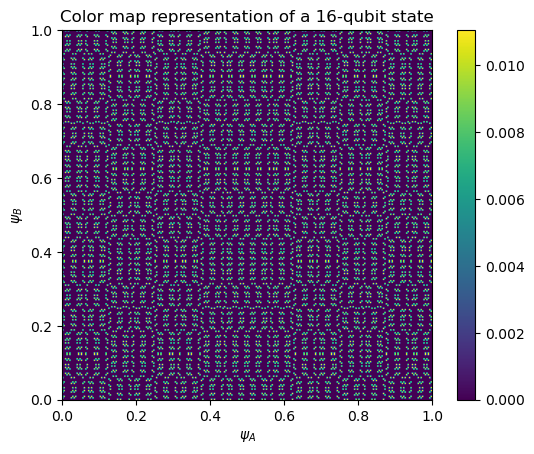

In [14]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector(qc)

amplitudes = np.abs(statevector)
amplitudes = amplitudes.reshape((2**int(n/2),2**int(n/2)))

# Generate the color map image.
plt.imshow(amplitudes, cmap='viridis', extent=[0, 1, 0, 1])
plt.colorbar()
# Define the positions for the five ticks: start, quarter, half, three-quarters, and end
tick_positions = np.linspace(0, 2**int(n/2), 8, endpoint=True)

# Define the corresponding labels
# Assuming the labeling starts from 2, you can adjust as needed


# # tick_labels = []
# # for i in range(8):
# #     tick_labels.append(str(2**i-1))

# # Set the tick positions and labels
# plt.xticks(ticks=tick_positions, labels=tick_labels)
# plt.yticks(ticks=tick_positions, labels=tick_labels)


plt.xlabel('$\psi_A$')
plt.ylabel('$\psi_B$')
plt.title('Color map representation of a '+str(n)+'-qubit state')
plt.show()

In [17]:
rho= DensityMatrix.from_instruction(qc) ##get the state vector of the system
# print(state)
rho_a=partial_trace(state=rho,qargs=list(range(int(n/2),n-1))) ##rho_a is the reduced density matrix for the first a subsystem A(as the paper has divided the whole system into A and B subsystem)
eigenvalues=np.linalg.eigvals(rho_a.data) ##entanglement spectrum is the set of the eigen values of the reduced density matrix
ES=sorted(eigenvalues,reverse=True)
print(ES)
ES_real=[i.real for i in ES ]
print(ES_real)
# lambd=np.sqrt(ES_real)
lambd=ES_real
print(lambd)

[(0.24026643896427757-2.032428489574372e-18j), (0.17981372613645624+3.90038545032692e-17j), (0.16620917245303327-3.541905963173928e-18j), (0.1182925465390606+8.42718378963879e-18j), (0.10566250191997134-6.37753976814682e-17j), (0.08632428494518331-1.477411991300347e-17j), (0.06791747848622319+9.079863390322768e-18j), (0.03551385055565018+7.080732833115941e-18j), (1.305966233134529e-16-6.337890786199956e-17j), (1.3005124409166472e-16+3.110520609447988e-17j), (1.0160579958599864e-16-2.691053196746522e-17j), (9.702013313944911e-17+1.6303900881299344e-17j), (9.135972687958225e-17+4.672543117504872e-17j), (7.047758820027237e-17-9.322674507679715e-17j), (5.618920112580994e-17+9.833239256753783e-17j), (4.436595838953249e-17-8.533394462397494e-17j), (3.8134430395144236e-17-2.7319592465754213e-17j), (3.562672735449569e-17+1.2203066818353852e-16j), (-1.5230402392862808e-18-1.554952145254754e-16j), (-6.0922205194767745e-18-9.956122524413274e-17j), (-1.4404420446687055e-17+1.2945567081208929e-16j)

In [19]:
print(lambd)
r_k_tilda=[]
for i in range(1,len(lambd)-1):
    del_k=lambd[i-1]-lambd[i]
    del_k_P1=lambd[i]-lambd[i+1]
    r_k_tilda.append(min(del_k,del_k_P1)/max(del_k,del_k_P1))
print(r_k_tilda)
r_mean=np.mean(r_k_tilda)
print(r_mean)

[0.24026643896427757, 0.17981372613645624, 0.16620917245303327, 0.1182925465390606, 0.10566250191997134, 0.08632428494518331, 0.06791747848622319, 0.03551385055565018, 1.305966233134529e-16, 1.3005124409166472e-16, 1.0160579958599864e-16, 9.702013313944911e-17, 9.135972687958225e-17, 7.047758820027237e-17, 5.618920112580994e-17, 4.436595838953249e-17, 3.8134430395144236e-17, 3.562672735449569e-17, -1.5230402392862808e-18, -6.0922205194767745e-18, -1.4404420446687055e-17, -3.134934844038374e-17, -3.526204734406517e-17, -3.786460546730095e-17, -5.85787943526312e-17, -6.356195029278401e-17, -6.676981759938289e-17, -7.997702307767744e-17, -8.56540620850052e-17, -8.58994455296538e-17, -9.875520977374809e-17, -1.029591302358232e-16]
[0.22504455213070168, 0.2839213618222613, 0.26358376405226586, 0.6531131921601421, 0.9518357603990982, 0.5680477043619301, 0.9124222640909262, 1.5356803423316926e-17, 0.01917281418047581, 0.16120916815471492, 0.8101302691049953, 0.2710644894564947, 0.684239641058

{'0000000000': 8.873346532e-05, '0000000001': 0.004141114680833, '0000000010': 0.001101936504546, '0000000011': 0.00071110056128, '0000000100': 0.000923820884495, '0000000101': 0.001141375231207, '0000000110': 0.002868841016117, '0000000111': 0.000345736006173, '0000001000': 0.001750214078513, '0000001001': 5.4707089796e-05, '0000001010': 0.000483626753768, '0000001011': 0.000997228876793, '0000001100': 0.001364515051116, '0000001101': 0.002974621272359, '0000001110': 0.000148234871632, '0000001111': 0.001061071382471, '0000010000': 7.553123005e-06, '0000010001': 0.003016713888683, '0000010010': 0.001128814498627, '0000010011': 0.000906882156542, '0000010100': 0.000937261388168, '0000010101': 0.001620823945704, '0000010110': 0.00252168195778, '0000010111': 0.000248468535188, '0000011000': 0.002717920470533, '0000011001': 0.000130488433876, '0000011010': 0.000356586720924, '0000011011': 0.000349008976565, '0000011100': 0.000788272863474, '0000011101': 0.002195034139218, '0000011110': 0.

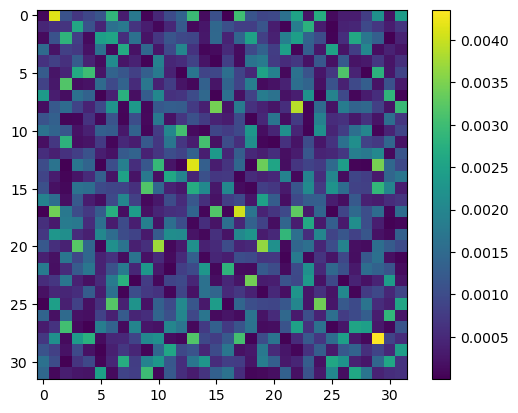

In [512]:

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector(qc)
amplitude=result.get_counts()
print(result.get_counts())
print(list(amplitude.values()))
print(sum(list(amplitude.values())))
print(statevector)
# Create and display the color map
num_states =2** int(qc.num_qubits/2)
wavefunction_matrix = np.reshape(list(amplitude.values()), (num_states, num_states))
plt.imshow(np.abs(wavefunction_matrix), cmap='viridis', interpolation='nearest')
plt.colorbar()

In [485]:
plt.savefig('images/random_cliff_T_random_clifford.png')


<Figure size 640x480 with 0 Axes>

In [323]:
print(rho_a)

DensityMatrix([[ 0.13401311+1.73472348e-17j,  0.03803817-2.81749181e-02j,
                -0.06378957-2.44823733e-02j, -0.02848387-3.56571748e-02j],
               [ 0.03803817+2.81749181e-02j,  0.32884519-3.64291930e-17j,
                -0.06079179-2.44660967e-01j,  0.08724778-1.26973081e-02j],
               [-0.06378957+2.44823733e-02j, -0.06079179+2.44660967e-01j,
                 0.28832992-3.12250226e-17j,  0.02827877+5.65021014e-02j],
               [-0.02848387+3.56571748e-02j,  0.08724778+1.26973081e-02j,
                 0.02827877-5.65021014e-02j,  0.24881178+2.20309881e-16j]],
              dims=(2, 2))


## now lets start creating r^telda

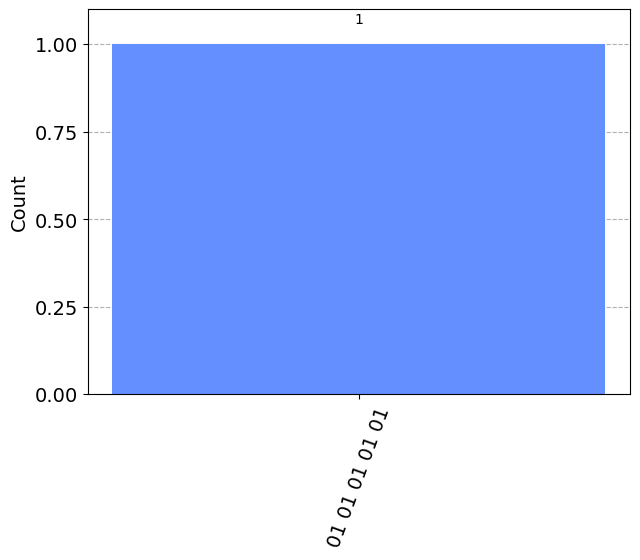

In [268]:

plot_histogram(result.get_counts(0))
# a=4
# list(range(int(a/2)))